In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm, colors

import glob
import gc
import warnings
import copy
import pathlib
import pickle

import os
import shutil

from scipy import stats
import signac
import freud
import gsd.hoomd
import hoomd
import schmeud
import schmeud._schmeud as schmeud_rs
from schmeud._schmeud import statics
from schmeud import ml
from tqdm import tqdm

from dataclasses import dataclass
from collections import defaultdict

from numba import njit

In [203]:
# traj = gsd.hoomd.open("/media/ian/Data2/monk/2d-osc-shear/workspace/634e14bc75836df75158fb15f379d8bb/aqs_experiments_preshear/max-shear-0.04/temp-0.0000/traj_period-0.001_preshear-1.gsd")
traj = gsd.hoomd.open("/media/ian/Data2/monk/2d-osc-shear/workspace/634e14bc75836df75158fb15f379d8bb/aqs_experiments/max-shear-0.06/temp-0.0000/traj_period-0.001.gsd")
# 1d0fe2ba44a6f635f5504dcbcee0ebc9

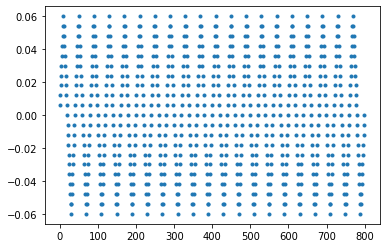

In [204]:
xys = []
for i in range(len(traj)):
    xys.append(traj[i].configuration.box[3])
plt.plot(xys, ".")

# xys = []
# for i in range(len(traj2)):
#     xys.append(traj2[i].configuration.box[3])
# plt.plot(xys[:10])

In [205]:
frame = 39 + 10*40
# frame = 0

In [206]:
snap0 = traj[frame]
snap1 = traj[frame + 40]

In [207]:
freud_box = freud.box.Box.from_box(snap0.configuration.box)

In [208]:
diff = np.linalg.norm(freud_box.wrap(snap1.particles.position - snap0.particles.position), axis=-1)

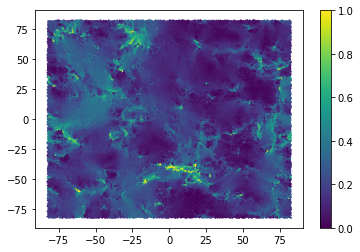

In [209]:
norm = mpl.colors.Normalize(vmin=0, vmax=1.0)
plt.scatter(snap0.particles.position[:, 0], snap0.particles.position[:, 1], c=diff, s=1, norm=norm)
plt.colorbar()